# Global Weather Data Analysis - Shatadru - Year 2020
This is the course project of the course "Zero to Pandas" in jovian.ml. This has been a fabulous course that helped me to learn so many things related to numpy, pandas library, and data visualization techniques. This project is about weather data analysis of the year 2020, upto September. We collected the dataset from : https://www.kaggle.com/vishalvjoseph/weather-dataset-for-covid19-predictions. Since this is specifically Covid-19 affected year, some data are missing due to pandemic situation all over the world. Yet, we tried to visualize the global weather on some parameters. Initially we analysed and cleaned the dataset by using various pandas and numpy operations. Later, we used several matplotlib and seaborn library functions like scatterplot, barplot, pieplot, regressionplot etc to answer the questions from the dataset.  


In [1]:
project_name = "course-project_Shatadru" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "shatadrusrc/course-project-shatadru" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/shatadrusrc/course-project-shatadru


'https://jovian.ml/shatadrusrc/course-project-shatadru'

## Data Preparation and Cleaning



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [13]:
#df=pd.read_excel("Datasets/income.xlsx")
df=pd.read_csv("Datasets/daily_weather_2020.csv", index_col=0)

In [14]:
df.shape

(30688, 44)

In [16]:
df

,Country/Region,Province/State,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
0,Afghanistan,NaN,31-12-19,Rain (with a chance of 1–3 in. of snow) until ...,rain,1.577847e+09,1.577883e+09,0.20,0.0156,0.1515,...,1577827140,48.36,1577864700,30.51,1577835720,47.86,1577864700,33.0000,65.0000,NaN
1,Afghanistan,NaN,01-01-20,Light rain throughout the day.,rain,1.577933e+09,1.577969e+09,0.23,0.0235,0.0985,...,1577918820,40.42,1577951460,29.84,1577919420,40.08,1577951220,33.0000,65.0000,NaN
2,Afghanistan,NaN,02-01-20,Clear throughout the day.,rain,1.578019e+09,1.578056e+09,0.26,0.0016,0.0062,...,1578020400,46.53,1578038340,26.27,1578020400,46.03,1578038340,33.0000,65.0000,NaN
3,Afghanistan,NaN,03-01-20,Partly cloudy throughout the day.,partly-cloudy-day,1.578106e+09,1.578142e+09,0.30,0.0003,0.0012,...,1578106320,45.77,1578124500,26.96,1578093240,45.35,1578124260,33.0000,65.0000,NaN
4,Afghanistan,NaN,04-01-20,Light rain throughout the day.,rain,1.578192e+09,1.578228e+09,0.33,0.0145,0.0310,...,1578193080,40.84,1578222000,33.33,1578193080,40.34,1578222000,33.0000,65.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30683,Zambia,NaN,16-04-20,Clear throughout the day.,clear-day,1.587097e+09,1.587139e+09,0.84,0.0004,0.0016,...,1587088440,83.88,1587121320,65.24,1587088440,83.38,1587121320,-15.4167,28.2833,NaN
30684,Zambia,NaN,17-04-20,Partly cloudy throughout the day.,clear-day,1.587183e+09,1.587225e+09,0.87,0.0001,0.0004,...,1587175680,80.93,1587208020,65.37,1587175680,80.43,1587208020,-15.4167,28.2833,NaN
30685,Zambia,NaN,18-04-20,Mostly cloudy throughout the day.,partly-cloudy-day,1.587270e+09,1.587312e+09,0.90,0.0004,0.0020,...,1587261780,78.99,1587294000,62.80,1587261780,78.49,1587294000,-15.4167,28.2833,NaN
30686,Zambia,NaN,19-04-20,Mostly cloudy throughout the day.,partly-cloudy-day,1.587356e+09,1.587398e+09,0.93,0.0016,0.0049,...,1587416400,75.04,1587388140,60.65,1587416400,74.54,1587388140,-15.4167,28.2833,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30688 entries, 0 to 30687
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country/Region               30688 non-null  object 
 1   Province/State               13776 non-null  object 
 2   time                         30688 non-null  object 
 3   summary                      30685 non-null  object 
 4   icon                         30688 non-null  object 
 5   sunriseTime                  30663 non-null  float64
 6   sunsetTime                   30663 non-null  float64
 7   moonPhase                    30688 non-null  float64
 8   precipIntensity              30688 non-null  float64
 9   precipIntensityMax           30688 non-null  float64
 10  precipIntensityMaxTime       30584 non-null  float64
 11  precipProbability            30688 non-null  float64
 12  precipType                   28444 non-null  object 
 13  temperatureHigh 



On close inspection we can see that 
1. There are many columns with unix system timestamp values, and moonphase, latitude, longitude which are not much useful to our work, so we wish to ignore them. 
2. The summary column and icon column should depict the same information, however there are some discrepancies visible on row #2, #30684. Also, count of summary is 3 less than icon, means there are some null/missing values.
3. 3rd column 'time' is actually the dates starting from 31st Dec 2019. We wish to rename it as 'Date'
4. Province/State and precipAccumulation has very less number of values than total count, also precipType has few less number of values. Need to investigate all these

In [18]:
df.columns

Index(['Country/Region', 'Province/State', 'time', 'summary', 'icon',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensity',
       'precipIntensityMax', 'precipIntensityMaxTime', 'precipProbability',
       'precipType', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure',
       'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover',
       'uvIndex', 'uvIndexTime', 'visibility', 'ozone', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'Lat', 'Long',
       'precipAccumulation'],
      dtype='object')

In [19]:
cols= ['Country/Region', 'Province/State', 'time', 'summary', 'icon', 'precipIntensity',
       'precipIntensityMax','precipProbability',
       'precipType', 'temperatureHigh',
       'temperatureLow','apparentTemperatureHigh',
       'apparentTemperatureLow',
       'dewPoint', 'humidity', 'pressure',
       'windSpeed', 'windGust', 'windBearing', 'cloudCover',
       'uvIndex', 'visibility', 'ozone', 'temperatureMin',
       'temperatureMax',
       'apparentTemperatureMin',
       'apparentTemperatureMax',
       'precipAccumulation']

df=df[cols]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30688 entries, 0 to 30687
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           30688 non-null  object 
 1   Province/State           13776 non-null  object 
 2   time                     30688 non-null  object 
 3   summary                  30685 non-null  object 
 4   icon                     30688 non-null  object 
 5   precipIntensity          30688 non-null  float64
 6   precipIntensityMax       30688 non-null  float64
 7   precipProbability        30688 non-null  float64
 8   precipType               28444 non-null  object 
 9   temperatureHigh          30688 non-null  float64
 10  temperatureLow           30688 non-null  float64
 11  apparentTemperatureHigh  30688 non-null  float64
 12  apparentTemperatureLow   30688 non-null  float64
 13  dewPoint                 30688 non-null  float64
 14  humidity              

In [21]:
df_new=df.rename(columns={'time':'Date'})

In [22]:
df_new.head()

,Country/Region,Province/State,Date,summary,icon,precipIntensity,precipIntensityMax,precipProbability,precipType,temperatureHigh,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
0,Afghanistan,NaN,31-12-19,Rain (with a chance of 1–3 in. of snow) until ...,rain,0.0156,0.1515,0.71,rain,48.36,...,39,0.99,2,5.534,372.6,32.96,48.36,30.51,47.86,NaN
1,Afghanistan,NaN,01-01-20,Light rain throughout the day.,rain,0.0235,0.0985,0.95,rain,40.42,...,163,0.99,2,1.192,330.2,32.33,40.42,29.84,40.08,NaN
2,Afghanistan,NaN,02-01-20,Clear throughout the day.,rain,0.0016,0.0062,0.25,rain,46.53,...,20,0.22,3,9.957,320.3,28.90,46.53,26.27,46.03,NaN
3,Afghanistan,NaN,03-01-20,Partly cloudy throughout the day.,partly-cloudy-day,0.0003,0.0012,0.14,rain,45.77,...,19,0.32,3,10.000,309.6,28.80,45.77,26.96,45.35,NaN
4,Afghanistan,NaN,04-01-20,Light rain throughout the day.,rain,0.0145,0.0310,0.83,rain,40.84,...,75,1.00,2,4.142,308.2,32.84,40.84,33.33,40.34,NaN


Let's check the 3 missing values of summary column

In [23]:
df_new[df_new.summary.isnull()]

,Country/Region,Province/State,Date,summary,icon,precipIntensity,precipIntensityMax,precipProbability,precipType,temperatureHigh,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
12221,Greenland,NaN,13-01-20,NaN,clear-day,0.0001,0.0002,0.10,snow,-36.81,...,108,0.27,0,9.196,268.5,-42.31,-36.69,-75.68,-68.13,0.26
12222,Greenland,NaN,14-01-20,NaN,partly-cloudy-day,0.0000,0.0002,0.06,NaN,-39.06,...,115,0.45,0,9.546,264.1,-44.31,-38.66,-76.73,-69.11,NaN
12235,Greenland,NaN,27-01-20,NaN,partly-cloudy-day,0.0002,0.0004,0.13,snow,-25.41,...,111,0.64,0,9.500,358.1,-32.19,-24.61,-64.25,-56.47,0.35


We see that all are in Greenland, in January. Let's see if we can fill it with similar values

In [24]:
df_new["Date"]=pd.to_datetime(df_new["Date"])

In [25]:
year=pd.DatetimeIndex(df_new.Date).year
month=pd.DatetimeIndex(df_new.Date).month
day=pd.DatetimeIndex(df_new.Date).day

df_new.insert(2,'day',day)
df_new.insert(3,'month',month)
df_new.insert(4,'year',year)

In [26]:
df_new

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
0,Afghanistan,NaN,31,12,2019,2019-12-31,Rain (with a chance of 1–3 in. of snow) until ...,rain,0.0156,0.1515,...,39,0.99,2,5.534,372.6,32.96,48.36,30.51,47.86,NaN
1,Afghanistan,NaN,1,1,2020,2020-01-01,Light rain throughout the day.,rain,0.0235,0.0985,...,163,0.99,2,1.192,330.2,32.33,40.42,29.84,40.08,NaN
2,Afghanistan,NaN,1,2,2020,2020-02-01,Clear throughout the day.,rain,0.0016,0.0062,...,20,0.22,3,9.957,320.3,28.90,46.53,26.27,46.03,NaN
3,Afghanistan,NaN,1,3,2020,2020-03-01,Partly cloudy throughout the day.,partly-cloudy-day,0.0003,0.0012,...,19,0.32,3,10.000,309.6,28.80,45.77,26.96,45.35,NaN
4,Afghanistan,NaN,1,4,2020,2020-04-01,Light rain throughout the day.,rain,0.0145,0.0310,...,75,1.00,2,4.142,308.2,32.84,40.84,33.33,40.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30683,Zambia,NaN,16,4,2020,2020-04-16,Clear throughout the day.,clear-day,0.0004,0.0016,...,96,0.15,9,10.000,253.5,64.75,83.88,65.24,83.38,NaN
30684,Zambia,NaN,17,4,2020,2020-04-17,Partly cloudy throughout the day.,clear-day,0.0001,0.0004,...,99,0.25,8,10.000,254.3,64.88,80.93,65.37,80.43,NaN
30685,Zambia,NaN,18,4,2020,2020-04-18,Mostly cloudy throughout the day.,partly-cloudy-day,0.0004,0.0020,...,102,0.47,7,10.000,254.1,62.31,78.99,62.80,78.49,NaN
30686,Zambia,NaN,19,4,2020,2020-04-19,Mostly cloudy throughout the day.,partly-cloudy-day,0.0016,0.0049,...,119,0.65,6,10.000,255.6,60.16,75.04,60.65,74.54,NaN


In [27]:
df_Greenland=df_new[df_new["Country/Region"]=='Greenland']
df_Greenland_Jan=df_Greenland[df_Greenland["month"]==1]
df_Greenland_Jan

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
12209,Greenland,NaN,1,1,2020,2020-01-01,Foggy throughout the day.,fog,0.0002,0.0006,...,188,0.68,0,1.700,323.8,-59.50,-46.15,-88.78,-69.29,0.93
12221,Greenland,NaN,13,1,2020,2020-01-13,NaN,clear-day,0.0001,0.0002,...,108,0.27,0,9.196,268.5,-42.31,-36.69,-75.68,-68.13,0.26
12222,Greenland,NaN,14,1,2020,2020-01-14,NaN,partly-cloudy-day,0.0000,0.0002,...,115,0.45,0,9.546,264.1,-44.31,-38.66,-76.73,-69.11,NaN
12223,Greenland,NaN,15,1,2020,2020-01-15,Foggy until evening.,partly-cloudy-day,0.0001,0.0003,...,125,0.55,0,6.041,278.7,-47.11,-36.27,-80.24,-68.20,0.35
12224,Greenland,NaN,16,1,2020,2020-01-16,Foggy overnight.,partly-cloudy-day,0.0002,0.0005,...,133,0.52,0,5.077,287.1,-40.81,-33.27,-72.89,-64.32,0.54
12225,Greenland,NaN,17,1,2020,2020-01-17,Foggy throughout the day.,snow,0.0003,0.0006,...,128,0.82,0,1.284,297.3,-35.38,-17.74,-64.23,-45.98,0.65
12226,Greenland,NaN,18,1,2020,2020-01-18,Windy overnight.,snow,0.0003,0.0017,...,144,0.68,0,2.540,306.7,-45.63,-27.16,-78.87,-55.48,0.88
12227,Greenland,NaN,19,1,2020,2020-01-19,Windy in the morning.,snow,0.0026,0.0071,...,143,0.95,0,0.588,298.4,-25.27,-11.14,-57.00,-39.74,3.58
12228,Greenland,NaN,20,1,2020,2020-01-20,"Foggy until afternoon, starting again overnight.",snow,0.0006,0.0022,...,264,0.84,0,3.762,301.3,-48.90,-24.01,-77.01,-41.19,1.38
12229,Greenland,NaN,21,1,2020,2020-01-21,Windy in the afternoon and evening.,partly-cloudy-day,0.0018,0.0068,...,144,0.80,0,3.127,298.9,-47.12,-7.58,-79.61,-34.67,2.61


In [28]:
#extract only the partly cloudy days
df_Greenland_Jan_PartlyCloudy=df_Greenland_Jan[df_Greenland_Jan["icon"]=='partly-cloudy-day'] 
df_Greenland_Jan_PartlyCloudy

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
12222,Greenland,NaN,14,1,2020,2020-01-14,NaN,partly-cloudy-day,0.0000,0.0002,...,115,0.45,0,9.546,264.1,-44.31,-38.66,-76.73,-69.11,NaN
12223,Greenland,NaN,15,1,2020,2020-01-15,Foggy until evening.,partly-cloudy-day,0.0001,0.0003,...,125,0.55,0,6.041,278.7,-47.11,-36.27,-80.24,-68.20,0.35
12224,Greenland,NaN,16,1,2020,2020-01-16,Foggy overnight.,partly-cloudy-day,0.0002,0.0005,...,133,0.52,0,5.077,287.1,-40.81,-33.27,-72.89,-64.32,0.54
12229,Greenland,NaN,21,1,2020,2020-01-21,Windy in the afternoon and evening.,partly-cloudy-day,0.0018,0.0068,...,144,0.80,0,3.127,298.9,-47.12,-7.58,-79.61,-34.67,2.61
12231,Greenland,NaN,23,1,2020,2020-01-23,Foggy in the morning.,partly-cloudy-day,0.0003,0.0009,...,335,0.63,0,5.420,312.7,-50.29,-32.12,-79.69,-63.65,1.13
12232,Greenland,NaN,24,1,2020,2020-01-24,Windy in the morning and afternoon.,partly-cloudy-day,0.0002,0.0009,...,117,0.48,0,6.898,331.3,-46.32,-28.44,-80.75,-60.72,0.64
12233,Greenland,NaN,25,1,2020,2020-01-25,"Foggy until afternoon, starting again overnight.",partly-cloudy-day,0.0002,0.0005,...,129,0.57,0,3.441,375.7,-37.89,-30.28,-69.50,-62.87,0.44
12234,Greenland,NaN,26,1,2020,2020-01-26,Foggy in the morning.,partly-cloudy-day,0.0002,0.0006,...,119,0.67,0,4.818,383.7,-34.41,-21.69,-65.40,-51.90,0.31
12235,Greenland,NaN,27,1,2020,2020-01-27,NaN,partly-cloudy-day,0.0002,0.0004,...,111,0.64,0,9.500,358.1,-32.19,-24.61,-64.25,-56.47,0.35
12236,Greenland,NaN,28,1,2020,2020-01-28,Foggy in the evening and overnight.,partly-cloudy-day,0.0002,0.0013,...,128,0.42,0,6.424,343.3,-35.17,-26.79,-67.96,-55.20,0.55


As we can see, we don't have data from 5th to 12th January. Since, 13th is mentioned to be a clear day, and precipIntensity on 14th is 0.00000, so we assume fog stared accumumulating from early morning of 14th and stayed for sometime in the morning. Again, on 26th we see it was foggy in the morning. So fog started from late evening or night and stayed till morning in 27th jan. So, let's fill "Foggy in the morning." in summary of both 14th and 27th Jan. 

In [29]:
df_new.at[12222,'summary']='Foggy in the morning.'
df_new.at[12235,'summary']='Foggy in the morning.'

In [30]:
df_Greenland=df_new[df_new["Country/Region"]=='Greenland']
df_Greenland_Jan=df_Greenland[df_Greenland["month"]==1]
df_Greenland_Jan

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
12209,Greenland,NaN,1,1,2020,2020-01-01,Foggy throughout the day.,fog,0.0002,0.0006,...,188,0.68,0,1.700,323.8,-59.50,-46.15,-88.78,-69.29,0.93
12221,Greenland,NaN,13,1,2020,2020-01-13,NaN,clear-day,0.0001,0.0002,...,108,0.27,0,9.196,268.5,-42.31,-36.69,-75.68,-68.13,0.26
12222,Greenland,NaN,14,1,2020,2020-01-14,Foggy in the morning.,partly-cloudy-day,0.0000,0.0002,...,115,0.45,0,9.546,264.1,-44.31,-38.66,-76.73,-69.11,NaN
12223,Greenland,NaN,15,1,2020,2020-01-15,Foggy until evening.,partly-cloudy-day,0.0001,0.0003,...,125,0.55,0,6.041,278.7,-47.11,-36.27,-80.24,-68.20,0.35
12224,Greenland,NaN,16,1,2020,2020-01-16,Foggy overnight.,partly-cloudy-day,0.0002,0.0005,...,133,0.52,0,5.077,287.1,-40.81,-33.27,-72.89,-64.32,0.54
12225,Greenland,NaN,17,1,2020,2020-01-17,Foggy throughout the day.,snow,0.0003,0.0006,...,128,0.82,0,1.284,297.3,-35.38,-17.74,-64.23,-45.98,0.65
12226,Greenland,NaN,18,1,2020,2020-01-18,Windy overnight.,snow,0.0003,0.0017,...,144,0.68,0,2.540,306.7,-45.63,-27.16,-78.87,-55.48,0.88
12227,Greenland,NaN,19,1,2020,2020-01-19,Windy in the morning.,snow,0.0026,0.0071,...,143,0.95,0,0.588,298.4,-25.27,-11.14,-57.00,-39.74,3.58
12228,Greenland,NaN,20,1,2020,2020-01-20,"Foggy until afternoon, starting again overnight.",snow,0.0006,0.0022,...,264,0.84,0,3.762,301.3,-48.90,-24.01,-77.01,-41.19,1.38
12229,Greenland,NaN,21,1,2020,2020-01-21,Windy in the afternoon and evening.,partly-cloudy-day,0.0018,0.0068,...,144,0.80,0,3.127,298.9,-47.12,-7.58,-79.61,-34.67,2.61


We see that there is no other 'clear day' in January. So let's see if there is any other 'clear day' in Greenland at all

In [31]:
df_Greenland=df_new[df_new["Country/Region"]=='Greenland']
df_Greenland_ClearDay=df_Greenland[df_Greenland["icon"]=='clear-day']
df_Greenland_ClearDay

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
12221,Greenland,NaN,13,1,2020,2020-01-13,NaN,clear-day,0.0001,0.0002,...,108,0.27,0,9.196,268.5,-42.31,-36.69,-75.68,-68.13,0.26
12249,Greenland,NaN,2,10,2020,2020-10-02,Clear throughout the day.,clear-day,0.0001,0.0003,...,100,0.30,0,9.952,274.3,-34.68,-22.79,-61.78,-51.09,0.31
12261,Greenland,NaN,22,2,2020,2020-02-22,Clear throughout the day.,clear-day,0.0002,0.0003,...,119,0.21,0,8.923,293.2,-57.54,-48.42,-86.50,-75.14,1.05
12264,Greenland,NaN,25,2,2020,2020-02-25,Clear throughout the day.,clear-day,0.0002,0.0003,...,96,0.06,0,10.000,322.8,-63.42,-49.29,-95.91,-80.23,1.25
12283,Greenland,NaN,15,3,2020,2020-03-15,Windy in the evening and overnight.,clear-day,0.0001,0.0002,...,91,0.04,1,10.000,309.1,-64.50,-41.44,-101.87,-76.94,0.47
12290,Greenland,NaN,22,3,2020,2020-03-22,Clear throughout the day.,clear-day,0.0001,0.0004,...,100,0.20,1,9.976,240.4,-55.47,-27.22,-81.17,-56.27,0.51
12302,Greenland,NaN,4,3,2020,2020-03-04,Clear throughout the day.,clear-day,0.0001,0.0002,...,63,0.17,2,10.000,244.0,-51.81,-27.86,-80.39,-57.04,0.20
12303,Greenland,NaN,4,4,2020,2020-04-04,Clear throughout the day.,clear-day,0.0001,0.0002,...,68,0.11,2,10.000,245.0,-48.32,-27.49,-80.89,-57.74,0.32
12304,Greenland,NaN,4,5,2020,2020-05-04,Clear throughout the day.,clear-day,0.0001,0.0002,...,73,0.01,2,10.000,258.3,-46.60,-23.64,-81.32,-51.17,0.18
12308,Greenland,NaN,4,9,2020,2020-09-04,Clear throughout the day.,clear-day,0.0002,0.0004,...,109,0.02,2,10.000,258.7,-37.13,-5.79,-65.78,-24.59,0.36


So, majorly we see that the summary description is "Clear throughout the day.", we shall fill the same in the NaN value

In [32]:
df_new.at[12221,'summary']='Clear throughout the day.'

In [33]:
df_new.summary.isnull().sum()

0

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30688 entries, 0 to 30687
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country/Region           30688 non-null  object        
 1   Province/State           13776 non-null  object        
 2   day                      30688 non-null  int64         
 3   month                    30688 non-null  int64         
 4   year                     30688 non-null  int64         
 5   Date                     30688 non-null  datetime64[ns]
 6   summary                  30688 non-null  object        
 7   icon                     30688 non-null  object        
 8   precipIntensity          30688 non-null  float64       
 9   precipIntensityMax       30688 non-null  float64       
 10  precipProbability        30688 non-null  float64       
 11  precipType               28444 non-null  object        
 12  temperatureHigh          30688 n

Let's check on 'Province/State', why the count is very low. 

In [35]:
df_new_State=df_new[df_new["Province/State"].isnull()==False]
df_new_State

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
896,Australia,Australian Capital Territory,31,12,2019,2019-12-31,Clear throughout the day.,clear-day,0.0005,0.0122,...,5,0.23,13,9.785,279.1,52.95,92.24,53.44,91.74,NaN
897,Australia,Australian Capital Territory,1,1,2020,2020-01-01,Clear throughout the day.,clear-day,0.0001,0.0003,...,61,0.01,13,10.000,278.2,48.86,90.40,48.57,89.90,NaN
898,Australia,Australian Capital Territory,1,2,2020,2020-02-01,Clear throughout the day.,clear-day,0.0000,0.0000,...,1,0.09,13,10.000,272.9,49.83,94.53,50.32,94.03,NaN
899,Australia,Australian Capital Territory,1,3,2020,2020-03-01,Clear throughout the day.,clear-day,0.0003,0.0017,...,300,0.08,13,10.000,270.0,62.30,104.66,62.87,104.16,NaN
900,Australia,Australian Capital Territory,1,4,2020,2020-04-01,Mostly cloudy throughout the day.,partly-cloudy-day,0.0004,0.0024,...,98,0.77,9,10.000,269.0,57.50,80.83,57.99,80.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30123,United Kingdom,United Kingdom,16,4,2020,2020-04-16,Mostly cloudy throughout the day.,partly-cloudy-day,0.0001,0.0003,...,87,0.73,3,10.000,346.4,35.93,49.66,29.42,44.33,NaN
30124,United Kingdom,United Kingdom,17,4,2020,2020-04-17,Clear throughout the day.,partly-cloudy-day,0.0001,0.0002,...,84,0.32,4,10.000,361.3,33.08,53.19,27.21,52.69,NaN
30125,United Kingdom,United Kingdom,18,4,2020,2020-04-18,Clear throughout the day.,clear-day,0.0003,0.0021,...,96,0.29,5,10.000,346.1,33.87,57.22,29.59,56.72,NaN
30126,United Kingdom,United Kingdom,19,4,2020,2020-04-19,Clear throughout the day.,clear-day,0.0001,0.0004,...,85,0.03,5,9.978,339.1,32.58,55.86,27.68,55.36,NaN


Let's see what all countries fall in this range

In [36]:
df_new_State_Countries=df_new_State["Country/Region"].unique()
df_new_State_Countries

array(['Australia', 'Canada', 'China', 'Cruise Ship', 'Denmark', 'France',
       'Netherlands', 'US', 'United Kingdom'], dtype=object)

In [37]:
df_new["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Central African Republic',
       'Chile', 'China', 'Colombia', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cruise Ship', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Equatorial Guinea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Guadeloupe', 'Guam', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ire

So we see that States of only a few countries are mentioned, but that is more than 40% of overall data, so we cannot eliminate those rows, neither we can fill them. Let's keep it as it is, or we can ignore the column, if need be. Now, let's check on 'precipType'

In [38]:
df_new_precipType=df_new[df_new["precipType"].isnull()==True]
df_new_precipType

,Country/Region,Province/State,day,month,year,Date,summary,icon,precipIntensity,precipIntensityMax,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
7,Afghanistan,NaN,1,7,2020,2020-07-01,Clear throughout the day.,clear-day,0.0,0.0002,...,43,0.00,3,10.0,319.7,23.66,44.69,15.87,44.22,NaN
8,Afghanistan,NaN,1,8,2020,2020-08-01,Clear throughout the day.,clear-day,0.0,0.0001,...,62,0.01,3,10.0,322.0,26.65,48.08,21.20,47.58,NaN
13,Afghanistan,NaN,13,1,2020,2020-01-13,Overcast throughout the day.,cloudy,0.0,0.0000,...,70,0.91,2,10.0,351.8,20.15,35.45,14.37,34.95,NaN
14,Afghanistan,NaN,14,1,2020,2020-01-14,Clear throughout the day.,clear-day,0.0,0.0001,...,60,0.17,3,10.0,344.0,23.12,39.13,16.54,38.63,NaN
27,Afghanistan,NaN,27,1,2020,2020-01-27,Clear throughout the day.,clear-day,0.0,0.0000,...,36,0.00,4,10.0,315.0,18.89,43.57,10.25,43.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30497,Vietnam,NaN,2,2,2020,2020-02-02,Clear throughout the day.,clear-day,0.0,0.0002,...,122,0.27,9,10.0,251.6,53.10,70.80,54.07,70.30,NaN
30518,Vietnam,NaN,23,2,2020,2020-02-23,Clear throughout the day.,clear-day,0.0,0.0003,...,79,0.19,9,10.0,265.5,48.74,72.27,48.60,71.77,NaN
30671,Zambia,NaN,4,4,2020,2020-04-04,Partly cloudy throughout the day.,clear-day,0.0,0.0002,...,88,0.24,9,10.0,259.2,58.28,81.53,58.77,81.03,NaN
30673,Zambia,NaN,4,6,2020,2020-06-04,Mostly cloudy throughout the day.,partly-cloudy-day,0.0,0.0003,...,82,0.56,7,10.0,263.8,63.82,84.95,64.31,84.45,NaN


In [39]:
print(df_new_precipType["Country/Region"].unique())
print(df_new_precipType["month"].unique()) 
print(df_new_precipType["precipAccumulation"].unique()) #precipAccumulation


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Canada' 'Central African Republic' 'Chile'
 'China' 'Congo (Brazzaville)' 'Congo (Kinshasa)' "Cote d'Ivoire"
 'Croatia' 'Cruise Ship' 'Cyprus' 'Denmark' 'Djibouti' 'Egypt' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guernsey' 'Guinea' 'Guyana'
 'Holy See' 'Hungary' 'India' 'Iran' 'Iraq' 'Israel' 'Italy' 'Japan'
 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Liberia' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Maldives' 'Malta' 'Mauritania' 'Mayotte' 'Mexico' 'Moldova'
 'Monaco' 'Mongolia' 'Montenegro' 'Morocco' 'Namibia' 'Nepal'
 'Netherlands' 'New Zealand' 'Nigeria' 'North Macedonia' 'Norway' 'Oman'
 'Pakistan' 'Paraguay' 'Philipp

So we see that, precipType=NaN is spanned across all countries and all months. Also, all precipAccumulation are also NaN for all the rows where precipType is NaN.

In [40]:
df_precipType=df_new[['icon', 'precipIntensity', 'precipIntensityMax', 'precipProbability', 'precipType']]
df_precipType

,icon,precipIntensity,precipIntensityMax,precipProbability,precipType
0,rain,0.0156,0.1515,0.71,rain
1,rain,0.0235,0.0985,0.95,rain
2,rain,0.0016,0.0062,0.25,rain
3,partly-cloudy-day,0.0003,0.0012,0.14,rain
4,rain,0.0145,0.0310,0.83,rain
...,...,...,...,...,...
30683,clear-day,0.0004,0.0016,0.08,rain
30684,clear-day,0.0001,0.0004,0.06,rain
30685,partly-cloudy-day,0.0004,0.0020,0.08,rain
30686,partly-cloudy-day,0.0016,0.0049,0.21,rain


In [41]:
df_precipType.precipType.unique()

array(['rain', nan, 'snow'], dtype=object)

In [42]:
df_precipType[df_precipType["precipType"]=='snow'].icon.unique()

array(['partly-cloudy-day', 'snow', 'clear-day', 'cloudy', 'wind', 'fog'],
      dtype=object)

In [43]:
df_precipType[df_precipType["precipType"]=='rain'].icon.unique()

array(['rain', 'partly-cloudy-day', 'clear-day', 'cloudy', 'wind', 'fog'],
      dtype=object)

So, even after further analysis, we cannot infer anything about the precipType values. Any type of weather can cause either of the two precipTypes. So, it is better to remove those rows from calculation.

In [45]:
df_new=df_new[df_new.precipType.isnull()==False]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28444 entries, 0 to 30687
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country/Region           28444 non-null  object        
 1   Province/State           13174 non-null  object        
 2   day                      28444 non-null  int64         
 3   month                    28444 non-null  int64         
 4   year                     28444 non-null  int64         
 5   Date                     28444 non-null  datetime64[ns]
 6   summary                  28444 non-null  object        
 7   icon                     28444 non-null  object        
 8   precipIntensity          28444 non-null  float64       
 9   precipIntensityMax       28444 non-null  float64       
 10  precipProbability        28444 non-null  float64       
 11  precipType               28444 non-null  object        
 12  temperatureHigh          28444 n

In [51]:
df_new.to_csv("Cleaned Weather Dataset.csv", index=False)

In [52]:
import jovian

In [53]:
jovian.commit(outputs=['Cleaned Weather Dataset.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "shatadrusrc/course-project-shatadru" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ml/shatadrusrc/course-project-shatadru


'https://jovian.ml/shatadrusrc/course-project-shatadru'

## Exploratory Analysis and Visualization

TODO

In [2]:
df_new=pd.read_csv("Cleaned_Weather_Dataset.csv")
df_new.describe()

,day,month,year,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
count,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,...,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,28444.000000,5498.000000
mean,13.373506,4.169104,2019.991281,0.005159,0.021592,0.322815,63.456753,47.194561,62.687560,45.195948,...,166.550098,0.531714,5.464492,9.340236,308.188813,46.701502,63.645196,44.576996,62.968396,0.708660
std,10.218280,3.283564,0.092969,0.010993,0.048086,0.305812,22.696066,22.294533,27.197497,26.339055,...,104.948048,0.307688,3.339213,1.582502,51.654242,22.595006,22.486382,26.726311,26.860312,1.660202
min,1.000000,1.000000,2019.000000,0.000100,0.000100,0.010000,-64.300000,-66.630000,-88.120000,-101.870000,...,0.000000,0.000000,0.000000,0.050000,215.900000,-68.820000,-58.820000,-101.870000,-86.780000,0.000000
25%,3.000000,2.000000,2020.000000,0.000200,0.000700,0.070000,46.980000,31.870000,42.760000,27.280000,...,73.000000,0.270000,3.000000,9.584000,263.200000,31.230000,47.317500,26.570000,43.220000,0.040000
50%,15.000000,3.000000,2020.000000,0.000900,0.004000,0.190000,65.105000,47.610000,64.650000,45.900000,...,162.000000,0.540000,5.000000,10.000000,297.100000,46.850000,65.255000,44.915000,64.785000,0.160000
75%,22.000000,6.000000,2020.000000,0.005000,0.021800,0.540000,82.660000,67.280000,85.450000,68.492500,...,257.000000,0.810000,8.000000,10.000000,346.700000,67.135000,82.660000,68.300000,85.450000,0.610000
max,31.000000,12.000000,2020.000000,0.280700,1.281300,1.000000,111.610000,86.930000,116.350000,99.790000,...,359.000000,1.000000,15.000000,10.000000,510.700000,86.190000,111.610000,99.810000,116.350000,33.810000


In [4]:
num_data_df=df_new.select_dtypes(exclude=[object])
print(num_data_df.columns)

Index(['day', 'month', 'year', 'precipIntensity', 'precipIntensityMax',
       'precipProbability', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility', 'ozone', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'precipAccumulation'],
      dtype='object')


During cleaning of 'summary' column, we noticed that in Greenland the data are available for days 1-4, then 13-31, 5-12 are missing. Let's check that further for other months and other countries.

In [47]:
df_Greenland=df_new[df_new["Country/Region"]=='Greenland']
df_Greenland[df_Greenland["month"]==3]["day"].unique()

array([ 1,  2,  3, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  4], dtype=int64)

In [51]:
df_Afg=df_new[df_new["Country/Region"]=='Afghanistan']
df_Afg[df_Afg["month"]==2]["day"].unique()

array([ 1,  2, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       29,  3,  4], dtype=int64)

In [52]:
df_Brz=df_new[df_new["Country/Region"]=='Brazil']
df_Brz[df_Brz["month"]==1]["day"].unique()

array([ 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31,  2,  3,  4], dtype=int64)

In [54]:
df_Den=df_new[df_new["Country/Region"]=='Denmark']
df_Den[df_Den["month"]==4]["day"].unique()

array([ 1,  2,  3, 13, 14, 15, 16, 17, 19, 20,  4, 18], dtype=int64)

So, we notice that data are missing for all countries for days 5-12 in the months Jan-Mar, and many other data are missing for later months. This might happen due to unavailability of data during that time, or due to covid-19 situation, data were not captured or not submitted to database. Whatever be the reason, we have to keep this in mind for later analysis. 

In [4]:
df_Ned=df_new[df_new["Country/Region"]=='Netherlands'][["Province/State","Date", "windSpeed", "temperatureHigh", "temperatureLow"]]
df_Ned["temperatureAvg"]=[((i+j)/2) for i,j in zip (df_Ned["temperatureHigh"], df_Ned["temperatureLow"])]
df_Ned

,Province/State,Date,windSpeed,temperatureHigh,temperatureLow,temperatureAvg
16012,Aruba,31-12-19,18.38,85.95,78.33,82.140
16013,Aruba,01-01-20,18.16,86.18,78.02,82.100
16014,Aruba,01-02-20,17.58,85.45,78.07,81.760
16015,Aruba,01-03-20,16.60,85.20,78.16,81.680
16016,Aruba,01-04-20,16.06,85.95,77.39,81.670
...,...,...,...,...,...,...
16336,Netherlands,16-04-20,10.27,64.46,42.40,53.430
16337,Netherlands,17-04-20,7.23,61.67,45.53,53.600
16338,Netherlands,18-04-20,12.34,65.23,43.90,54.565
16339,Netherlands,19-04-20,17.29,66.40,47.01,56.705


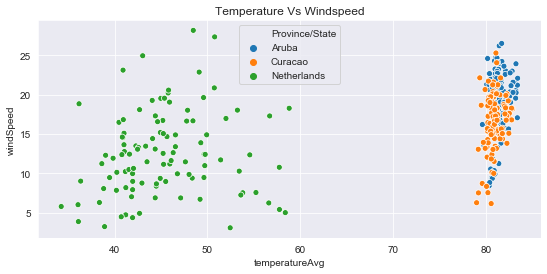

In [5]:
plt.figure(figsize=(9, 4))
sns.set_style("darkgrid")
plt.title('Temperature Vs Windspeed')
sns.scatterplot('temperatureAvg','windSpeed', hue= 'Province/State', data=df_Ned);

We find that Aruba and Curacao have totally different weather behaviour than Netherlands. They have quite high temperature, around 80'F, where as Netherlands have temp around 20-60'F. On further searching online, we find that Aruba and Curacao are not at all listed in the provinces of Netherlands. Netherlands is a country in Europe, whereas those two are islands just north to South American continent. That's why they have high temperature, and Netherlands being a European country, has lower temperature. 

We are not sure if this was a human error. But we must keep in mind that taking Netherlands provinces would give incorerct result.

However, if we closely observe the scatterplot of province 'Netherlands', we see that there is an increase in windspeed as temperature increases in the range 20-50'F.  

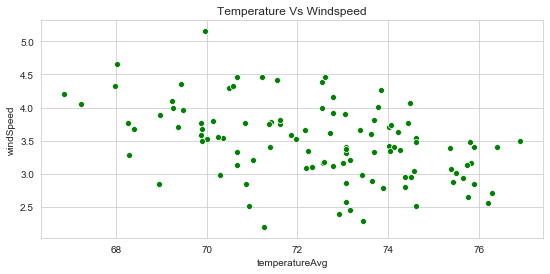

In [75]:
df_Sri=df_new[df_new["Country/Region"]=='Sri Lanka'][["Province/State","Date", "windSpeed", "temperatureHigh", "temperatureLow"]]
df_Sri["temperatureAvg"]=[((i+j)/2) for i,j in zip (df_Sri["temperatureHigh"], df_Sri["temperatureLow"])]
plt.figure(figsize=(9, 4))
sns.set_style("whitegrid")
plt.title('Temperature Vs Windspeed')
sns.scatterplot('temperatureAvg','windSpeed', data=df_Sri, color='g');

In Srilanka, we notice that with increase in temperature, the windspeed decreases. 

## Asking and Answering Questions



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df_new=pd.read_csv("Cleaned_Weather_Dataset.csv")

### Q.1 Find the country with most precipitation throughout the year. 

In [46]:
totalPrecip=[(i*j) for i, j in zip(df_new["precipIntensity"],df_new["precipProbability"])]
df_new.insert(8,"totalPrecip",totalPrecip)
df_new

,Country/Region,Province/State,day,month,year,Date,summary,icon,totalPrecip,precipIntensity,...,windBearing,cloudCover,uvIndex,visibility,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,precipAccumulation
0,Afghanistan,NaN,31,12,2019,31-12-19,Rain (with a chance of 1–3 in. of snow) until ...,rain,0.011076,0.0156,...,39,0.99,2,5.534,372.6,32.96,48.36,30.51,47.86,NaN
1,Afghanistan,NaN,1,1,2020,01-01-20,Light rain throughout the day.,rain,0.022325,0.0235,...,163,0.99,2,1.192,330.2,32.33,40.42,29.84,40.08,NaN
2,Afghanistan,NaN,1,2,2020,01-02-20,Clear throughout the day.,rain,0.000400,0.0016,...,20,0.22,3,9.957,320.3,28.90,46.53,26.27,46.03,NaN
3,Afghanistan,NaN,1,3,2020,01-03-20,Partly cloudy throughout the day.,partly-cloudy-day,0.000042,0.0003,...,19,0.32,3,10.000,309.6,28.80,45.77,26.96,45.35,NaN
4,Afghanistan,NaN,1,4,2020,01-04-20,Light rain throughout the day.,rain,0.012035,0.0145,...,75,1.00,2,4.142,308.2,32.84,40.84,33.33,40.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28439,Zambia,NaN,16,4,2020,16-04-20,Clear throughout the day.,clear-day,0.000032,0.0004,...,96,0.15,9,10.000,253.5,64.75,83.88,65.24,83.38,NaN
28440,Zambia,NaN,17,4,2020,17-04-20,Partly cloudy throughout the day.,clear-day,0.000006,0.0001,...,99,0.25,8,10.000,254.3,64.88,80.93,65.37,80.43,NaN
28441,Zambia,NaN,18,4,2020,18-04-20,Mostly cloudy throughout the day.,partly-cloudy-day,0.000032,0.0004,...,102,0.47,7,10.000,254.1,62.31,78.99,62.80,78.49,NaN
28442,Zambia,NaN,19,4,2020,19-04-20,Mostly cloudy throughout the day.,partly-cloudy-day,0.000336,0.0016,...,119,0.65,6,10.000,255.6,60.16,75.04,60.65,74.54,NaN


In [47]:
df_precip=df_new.groupby('Country/Region')[["totalPrecip"]].sum()
df_precip
df_precip.sort_values('totalPrecip', ascending=False).head(20)

,totalPrecip
Country/Region,
US,26.523728
China,7.695274
Australia,5.122615
France,4.003270
Colombia,3.449318
Canada,3.108997
Malaysia,2.019831
United Kingdom,1.994280
Peru,1.922547


Hence, we see that US has the most precipitaion. Let's check the precipitation of all countries in a barplot 

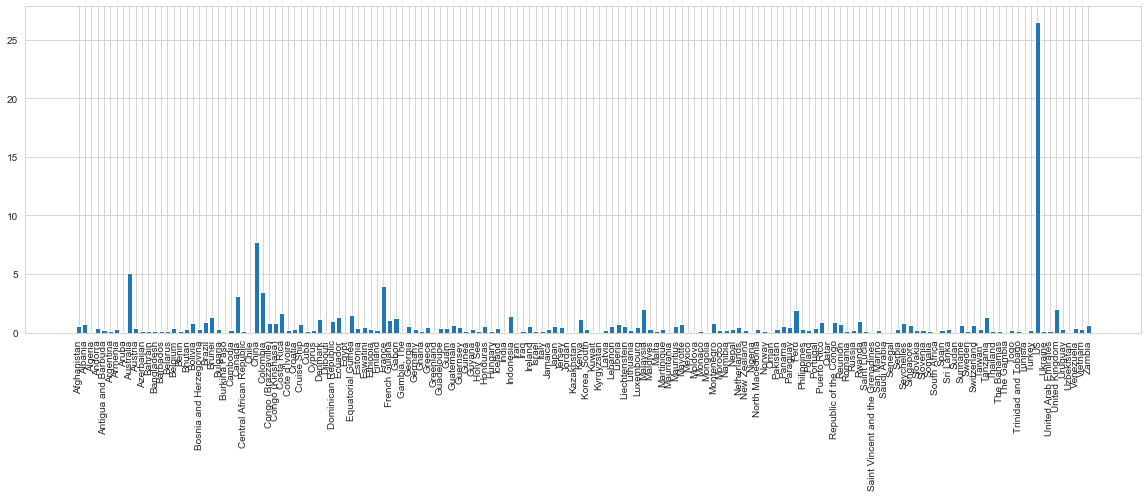

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.bar(df_precip.index, df_precip['totalPrecip']);

We see that US, China and Australia as relatively higher precipitaion than other countries. Let's do some further analysis on why they have higher precipitaion. 

In [49]:
df_US=df_new[df_new["Country/Region"]=='US']
print("US:", len(df_US["Province/State"].unique()))

df_China=df_new[df_new["Country/Region"]=='China']
print("China:", len(df_China["Province/State"].unique()))

df_Aus=df_new[df_new["Country/Region"]=='Australia']
print("Australia:", len(df_Aus["Province/State"].unique()))


US: 56
China: 29
Australia: 9



We see that count of "Province/State" for United States is highest, second and third positions are held by China and Australia respectively. The data of these countries hold information about each states of the country. So the combined precipitate data has accumulated to be quite high compared to other countries. 

Let's try this again without the countries that have provinces. 

In [50]:
df_others=df_new[df_new["Province/State"].isnull()==True]

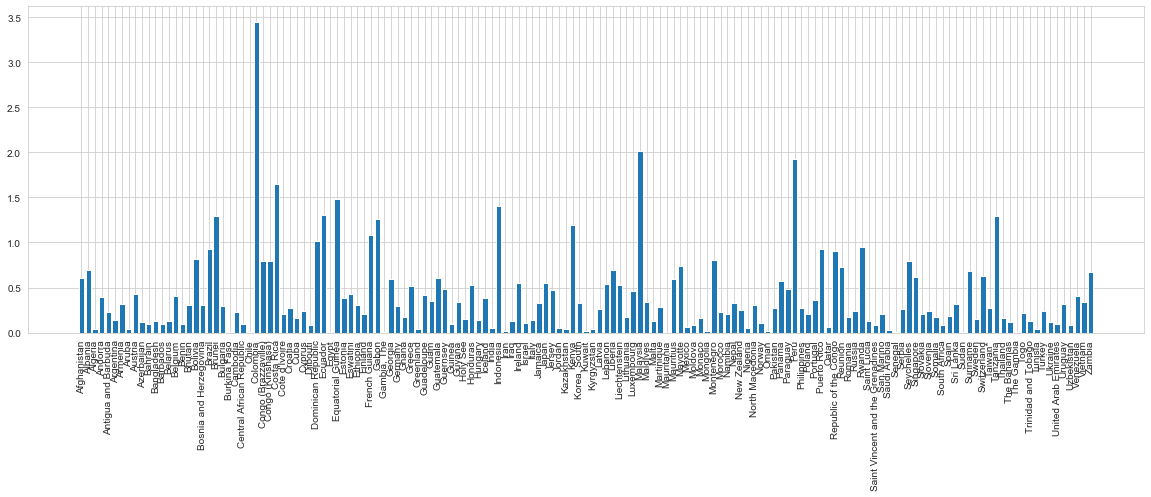

In [51]:
df_precip_others=df_others.groupby('Country/Region')[["totalPrecip"]].sum()
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.bar(df_precip_others.index, df_precip_others['totalPrecip']);

In [52]:
df_precip_others.sort_values('totalPrecip', ascending=False).head()

,totalPrecip
Country/Region,
Colombia,3.449318
Malaysia,2.019831
Peru,1.922547
Costa Rica,1.654801
Equatorial Guinea,1.481858


Now we see different result. The top 5 coutries are - Colombia, Malaysia, Peru, Costa Rica, Equatorial Guinea. Yet we cannot infer if this is the correct result, data from many countries cound be missing. 

### Q.2 Find the top 5 hot weather states (excluding islands & territories) in Unites States in 2020. Also find the coolest state in summer.  

Let us first filter out the states only (We'll include District of Columbia in our analysis.)

In [53]:
df_US["Province/State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'US', 'United States Virgin Islands', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [54]:
other=['Guam', 'Puerto Rico', 'US', 'United States Virgin Islands', 'Virgin Islands']
df_US_filtered=df_US[~df_US["Province/State"].isin(other)]
df_US_filtered["Province/State"].nunique()

51

Let us now filter out some of the relevant columns for this purpose. Also. we know that summer in US is from June to August. So, let's create the dataframe accordingly. 

In [55]:
df_US_summer=df_US_filtered[["Province/State", "day", "month", "year","temperatureHigh", "temperatureLow"]]
df_US_summer=df_US_summer[df_US_summer["month"].isin([6,7,8])]

In [56]:
df_US_summer["temperatureAvg"]=[((i+j)/2) for i,j in zip(df_US_summer["temperatureHigh"],df_US_summer["temperatureLow"] )]
df_US_summer

,Province/State,day,month,year,temperatureHigh,temperatureLow,temperatureAvg
20964,Alabama,1,6,2020,67.34,50.55,58.945
20965,Alabama,1,7,2020,62.47,31.89,47.180
20966,Alabama,1,8,2020,63.61,34.41,49.010
20995,Alabama,2,6,2020,69.86,35.64,52.750
20996,Alabama,2,7,2020,50.36,34.52,42.440
...,...,...,...,...,...,...,...
27159,Wyoming,3,7,2020,39.65,28.60,34.125
27160,Wyoming,3,8,2020,36.23,19.39,27.810
27189,Wyoming,4,6,2020,49.78,31.66,40.720
27190,Wyoming,4,7,2020,52.18,30.51,41.345


Now, we have daily average temperature calculated. But we have to calculate overall average for each state in that period, and find the top 5 states accordingly. 

In [57]:
df_US_summer_avg=df_US_summer.groupby('Province/State')[["temperatureAvg"]].mean()
df_US_summer_avg.sort_values('temperatureAvg', ascending=False).head()

,temperatureAvg
Province/State,
Hawaii,73.956667
Florida,64.796667
Texas,61.020417
Louisiana,59.535833
Alabama,56.311667


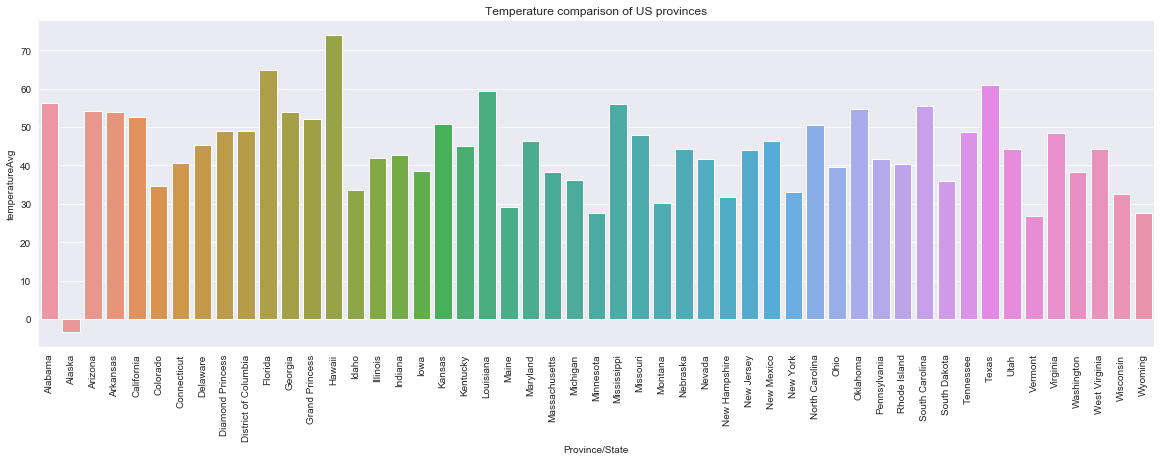

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
plt.title('Temperature comparison of US provinces')
plt.xticks(rotation=90)
sns.barplot(df_US_summer_avg.index, 'temperatureAvg', data=df_US_summer_avg);

So, coolest state is Alaska

Let's do a little more analysis on the top 5 states

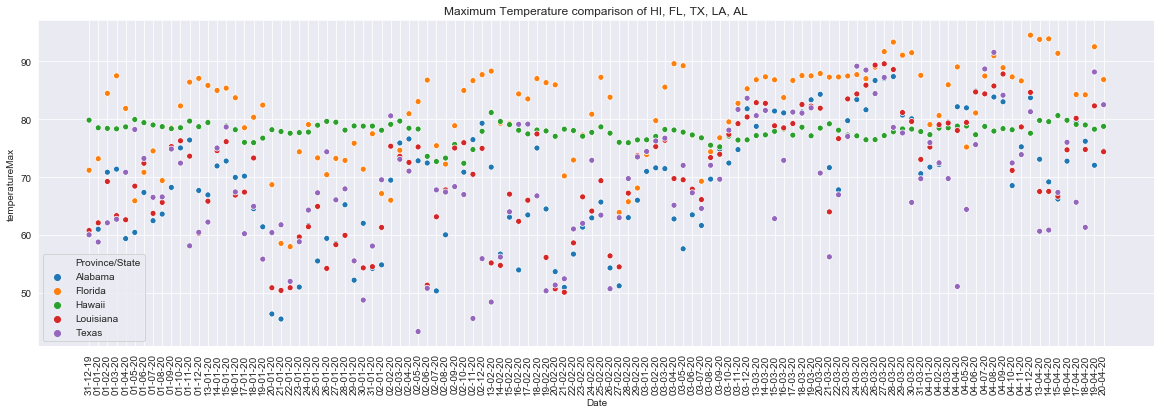

In [59]:
df_5States=df_US_filtered[df_US_filtered['Province/State'].isin(['Hawaii', 'Florida', 'Texas', 'Louisiana', 'Alabama'])]

plt.figure(figsize=(20, 6))
plt.title('Maximum Temperature comparison of HI, FL, TX, LA, AL')
plt.xticks(rotation=90)
sns.scatterplot('Date','temperatureMax', hue='Province/State', data=df_5States);

Interestingly, all other states have wider range for the max temperature throughout the year, only hawaii has a narrower range, mostly it is 75-80'F throughout the year. Means this state has a constant hot weather throughout the year. 

### Q 3. Which type of precipitaion is most common in Chinese provinces?

Let's check the precipitaion type throughout China.

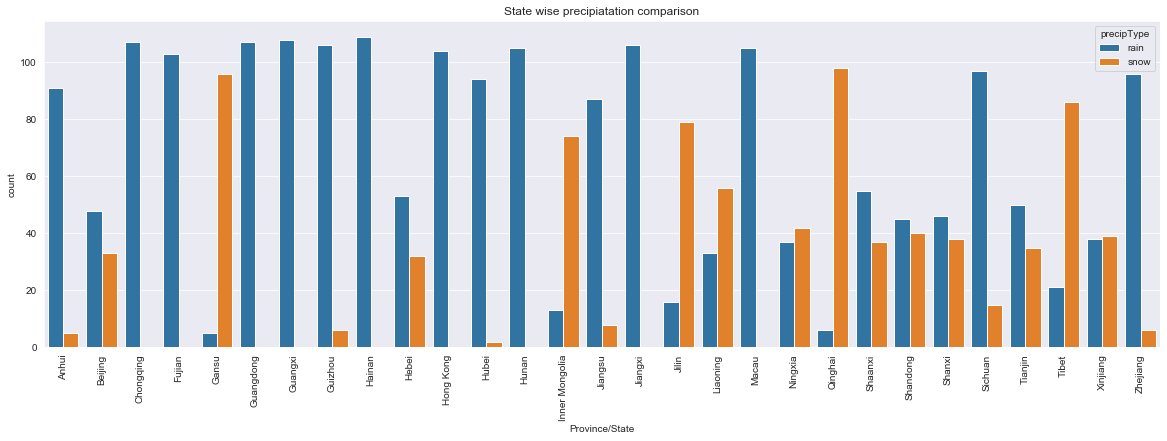

In [60]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.title("State wise precipiatation comparison")
sns.countplot('Province/State',hue='precipType',data=df_China);

It seems rain is more than snow, but we not able to get exact percentage value. Let's do pie chart for comparison.

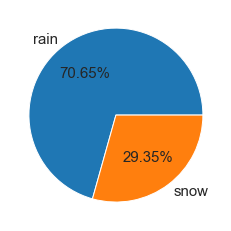

In [61]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
plt.pie(df_China.value_counts('precipType'), labels = df_China.precipType.unique(), autopct='%1.2f%%') 
plt.show() 

As we can see, rain is predominant in China, some of the provinces like Chongqing, Guangxi, Hong Kong, Hunan have only rains, no snow. Some provinces like Anhui, Guizhou, Hubei Jiangsu etc have small amount of snow along with rain. Exceptions like, Gansu, Qinghai, Tibet have high amount of snow compared to rain. 

### Q 4. Which month in India is most humid?

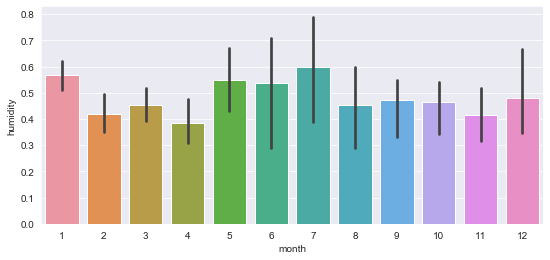

In [64]:
df_Ind=df_new[df_new["Country/Region"]=='India']
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize=(9, 4))
#sns.countplot('month',hue='precipType',data=df_Afg);
sns.barplot(x='month',y='humidity', data=df_Ind);

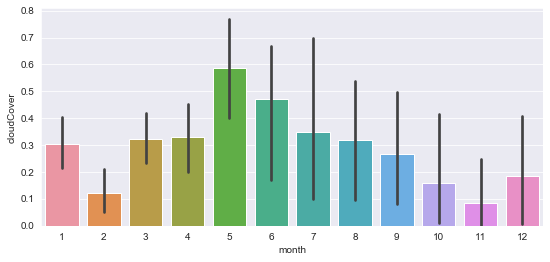

In [65]:
plt.figure(figsize=(9, 4))
sns.barplot('month', 'cloudCover', data=df_Ind);

July is the most humid month in India. This is obvious because that is the rainy season in India. Also to note, variations are quite high in June and July, whereas in the beginning of the year, i.e. during end of winter and spring, variations are quite low. However, May had the most cloud cover, it's because that's the second half of summer where clouds start to develop. 

### Q 5. UV ray is harmful for eye and skin. Which countries (excluding the countries that have province details) have the most UV ray pollution? 

In [66]:
df_others_uv=df_others[['Country/Region', 'Date', 'uvIndex']]

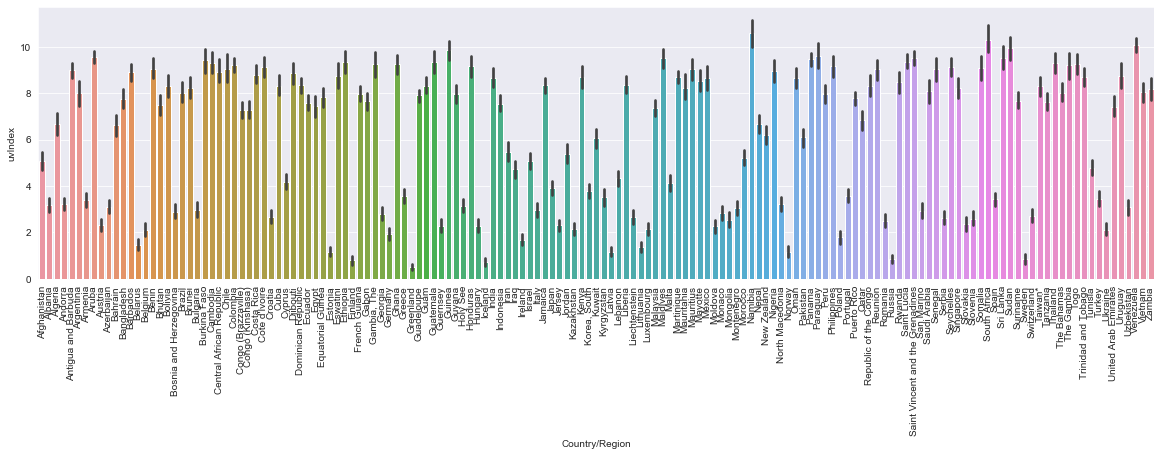

In [67]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.0
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot('Country/Region', 'uvIndex', data=df_others_uv);

We see that for some countries the average uvIndex is more than 10. Since this is an average value plot, we are not getting the exact country names which has hit the top. Also, for the countries whose lower value is less than 10, their average value is decreased, even though at some point they had max value more than 10. So, let us chech the max values of uvIndex of all countries. 

In [68]:
df_others_uvmax=df_others_uv.groupby('Country/Region')[['uvIndex']].max()
df_others_uvmax.sort_values('uvIndex', ascending=False).head(10)

,uvIndex
Country/Region,
Zambia,15
Tanzania,15
Mayotte,15
Namibia,15
Rwanda,15
Eswatini,15
South Africa,15
Malaysia,14
Maldives,14


So we see, Zambia, Tanzania, Mayotte, Namibia, Rwanda, Eswatini, South Africa - have the most uv ray pollution. 

In [69]:
df_others_uvmax.sort_values('uvIndex').head(10)

,uvIndex
Country/Region,
Greenland,2
Sweden,3
Iceland,3
Russia,4
Estonia,4
Finland,4
Latvia,4
Norway,4
Ireland,5


Greenland, Sweden, Iceland - these are some countries which have low uvIndex level, hence good for living. 

Let's check the uvIndex in a bar plot, the frequency of each uvIndex value. 

In [70]:
df_others_uvmax.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Austria', 'Azerbaijan',
       ...
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'Zambia'],
      dtype='object', name='Country/Region', length=151)

In [71]:
df_others_uvmax=df_others_uv.groupby('Country/Region')[['uvIndex']].max()
df_others_uvmax.sort_values('uvIndex')

,uvIndex
Country/Region,
Greenland,2
Sweden,3
Iceland,3
Russia,4
Estonia,4
...,...
Rwanda,15
Mayotte,15
South Africa,15


In [72]:
df_others_uvmax[df_others_uvmax["uvIndex"]==5].index.nunique()


4

[1, 2, 5, 4, 10, 21, 10, 4, 5, 6, 12, 27, 37, 7] 151


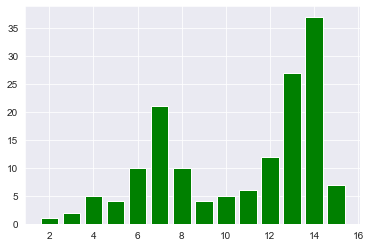

In [73]:
import numpy as np
uv=df_others_uvmax["uvIndex"].unique()
uv_sorted=np.sort(uv)
uv_count=[]
for i in (uv_sorted):
    c=df_others_uvmax[df_others_uvmax["uvIndex"]==i].index.nunique()
    uv_count.append(c)
print(uv_count, np.sum(uv_count))
plt.bar(uv_sorted, uv_count, color='g');

So, we see that: 
- 37 countries have touched max uvIndex = 14
- 27 countries have touched max uvIndex = 13, 
- 21 countries have touched max uvIndex = 7, 
and so on. 

In [3]:
import jovian

ModuleNotFoundError: No module named 'jovian'

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

In [9]:
import jovian

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion


We have explored the weather dataset as much as possible in our short span. The points to be noted are: 
* Real life dataset is prone to have errors, misspelling, missing or wrong data, we have to analyze and find out such data and clean the data as much as possible for good results. 
* Since this data is of the year 2020, there could be entries missing due to pandemic situation where people could not go to work, collect/receive/submit data.
* We have analysed the data for some of the countries like US, China, India, Netherlands, Greenland along with the global analysis on parameters like - windspeed, temperature, uvIndex, precipiation etc. 
* The errors found are:
     - a. For months Jan-Mar, there are data missing from 5th to 12th for each month, for all countries 
     - b. There are more missing data for subsequent months
     - c. State wise details was given for only some of the countries. 
     - d. Even within US states, we saw some wrong/unsynchronized entries. In province/state column it was written 'US'. Also 'Virgin Islands' and 'U.S. Virgin Islands' are necessarily same but entered separately. Since we found several such errors, we decided to restrict our analysis with US states, excluding the territories. 
     - e. Aruba and Curacao are wrongly entered as provinces of Netherlands. There could be more like this. 
 
* The Analysis results we found are:
     - a. Countries with high number of provinces registered higher precipitation accumulation, which led those countris to be marked as outlier in the barplot of global precipitation. After removing the countries with provinces, we found that the top 5 coutries are - Colombia, Malaysia, Peru, Costa Rica, Equatorial Guinea. However, we cannot infer if this is the correct result, data from many countries cound be missing.
     - b. 5 hottest states in US are - Hawaii, Florida, Texas, Louisiana, Alabama; the coolest state is Alaska. Hawaii as a steady temperature 75-80'F throughout the year. 
     - c. There are 29 Chinese provinces. Rain is prevalent across the states in China. About 70% is rain and only about 30% is snow. There are many states pouring only rain, but no state with only snow.
     - d. In India, July was most humid. Variation of humidity is quite high in May-Aug, but low in Jan-Apr. However cloud cover was more in May, and gradually decreased in subsequent months.
     - e. Zambia, Tanzania, Mayotte, Namibia, Rwanda, Eswatini, South Africa - have the most uv ray pollution. Greenland, Sweden, Iceland - these are some countries which have low uvIndex level.
     - f. uvIndex = 6 has the maximum frequency of 137 countries, then uvIndex = 7 with 129 countries, uvIndex = 5 with 120 countries, and so on.
     - g. In Netherlands, increase in windspeed is noticed with increase in temperature in range 20-50'F. However, in SriLanka, we noticed decrease in windspeed as temperature increases.
     
Though the dataset was named as "weather data for covid 19", there was no covid related data, like affected, deceased, recovered etc. So, it is not possible to predict something about covid purely based on weather conditions. Rather, we approached this task as a weather analysis of the year 2020. 

Let us look at all these results is a single grid. 

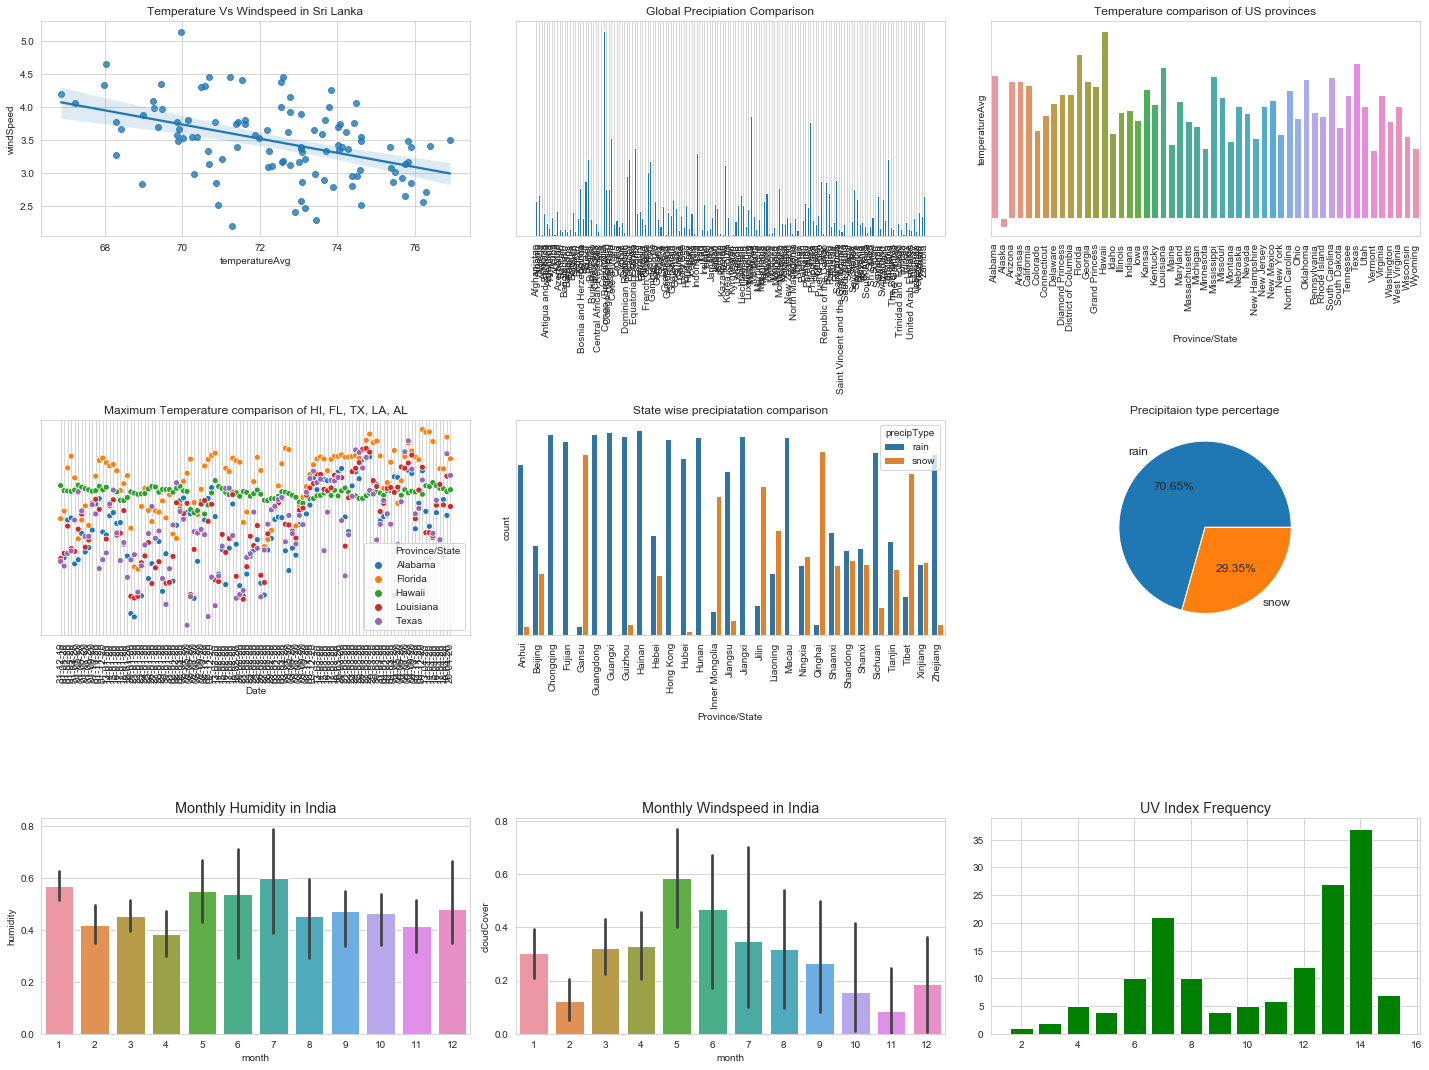

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
import matplotlib as mpl

# plot 1
axes[0,0].set_title('Temperature Vs Windspeed in Sri Lanka')
sns.regplot('temperatureAvg','windSpeed', data=df_Sri, ax=axes[0,0]);


# Plot 2
axes[0,1].set_title('Global Precipiation Comparison')
#axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].tick_params(labelrotation=90)
axes[0,1].bar(df_precip_others.index, df_precip_others['totalPrecip']);


# Plot 3
axes[0,2].set_title('Temperature comparison of US provinces')
axes[0,2].set_xticks([])
axes[0,2].set_yticks([])
axes[0,2].tick_params(labelrotation=90)
sns.barplot(df_US_summer_avg.index, 'temperatureAvg', data=df_US_summer_avg, ax=axes[0,2]);


# Plot 4
axes[1,0].set_title('Maximum Temperature comparison of HI, FL, TX, LA, AL')
#axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].tick_params(labelrotation=90)
sns.scatterplot('Date','temperatureMax', hue='Province/State', data=df_5States, ax=axes[1,0]);

# Plot 5
axes[1,1].set_title('State wise precipiatation comparison')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].tick_params(labelrotation=90)
sns.countplot('Province/State',hue='precipType',data=df_China, ax=axes[1,1]);


# Plot 6
axes[1,2].set_title('Precipitaion type percertage')
#axes[1,2].set_rcParams['font.size'] = 12.0
mpl.rcParams['font.size'] = 12.0
axes[1,2].pie(df_China.value_counts('precipType'), labels = df_China.precipType.unique(), autopct='%1.2f%%') 


# Plot 7
axes[2,0].set_title('Monthly Humidity in India')
sns.barplot(x='month',y='humidity', data=df_Ind, ax=axes[2,0]);


# Plot 8
axes[2,1].set_title('Monthly Windspeed in India')
sns.barplot('month', 'cloudCover', data=df_Ind, ax=axes[2,1]);

# Plot 9
axes[2,2].set_title('UV Index Frequency')
axes[2,2].bar(uv_sorted, uv_count, color='g');

plt.tight_layout(pad=1);

 Future Scope:
 - This analysis could be extended to other countries which were not explored in this analysis.
 - A comparison based analysis could abe done between countries, like the comparison of rainfall amonth the countries in Asia. An extended comparison could be done between continents. like, which continent has most snowfall. Of course, that would require some manual effort since we do not have the continent information in the dataset. We have to find a dataset that has this information and merge the continent column. 
 - Also, further analysis could be done on parameters like Ozone layer, pressure, visibility, dewpoint, for any country, or comparison between countries. 

Resources:
- Matplotlib: https://matplotlib.org/tutorials/index.html
- Seaborn : https://seaborn.pydata.org/tutorial.html
- Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [11]:
import jovian

In [12]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

TODO

In [13]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
